In [25]:
from multicell_utils.builder import ModelBuilder, ProcessCreator, ObjectCreator

In [26]:
new_object = ObjectCreator(
    type='ExtracellularMatrix',
    inherits_from='Material',
    attributes={'density': 1.0, 'stiffness': 1.0},
)
new_object.validate()
new_object.register(overwrite=True)
new_object.save(filename='ecm_object.json')

new_process = ProcessCreator(
    type='Collision',
    participating_objects=['ExtracellularMatrix', 'Cell'],
)
new_process.validate()
new_process.register(overwrite=True)
new_process.save(filename='collision_process.json')

Overwriting schema despite registration failure: Object schema 'ExtracellularMatrix' is already registered.
Schema saved to schema/object/ecm_object.json
Overwriting schema despite registration failure: Process schema type 'Collision' is already registered.
Schema saved to schema/process/collision_process.json


In [27]:
demo_model = ModelBuilder(model_name='demo')
demo_model.add_object(name='chemical field', object_type='Field')
demo_model.add_object(name='extracellular matrix', object_type='ExtracellularMatrix')
demo_model.add_process(name='collision', process_type='Collision', participating_objects=['extracellular matrix'])

In [28]:
demo_model.validate()
demo_model.save('demo_model2.json')

Model saved to models/demo_model2.json


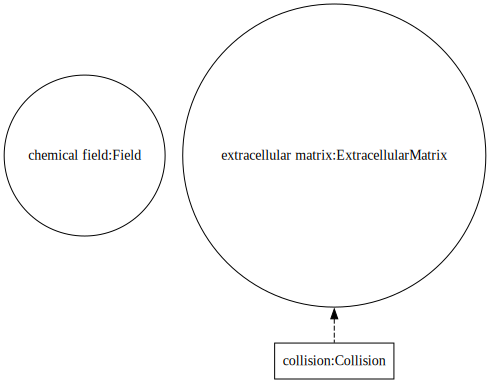

In [29]:
demo_model.graph()
